### **Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/salimshrestha98/Stock-Price-Prediction-And-Forecasting-Using-Stacked-LSTM/raw/main/data/ALICL.csv', index_col='Date')

In [3]:
## Only extract the Close price column.
df1 = df.c

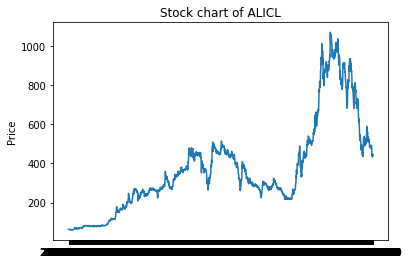

In [4]:
plt.plot(df1)
plt.title('Stock chart of ALICL')
plt.ylabel('Price')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range=(0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

Explaination:

---

Here, we scale the price index between zero(0) and one(1). For this purpose we utilize the MinMaxScaler provided by the sklearn library.
We convert the data into one dimensional numpy array before feeding it to the scaler.

**Train Test Split**

---


We have many ways to split the data into train and test sets.  
But, with time series data, we cannot split the data on random.  
So, here we take 65% of our data as train data and remaining data as test data.

In [6]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[:training_size, :], df1[training_size:len(df1), :]

In [7]:
training_size,test_size

(1553, 837)

Now, we have 1553 instances in our training set and 837 instances in our test set.

Computing Timesteps

---

Timesteps are the number of previous values to use to predict the next value.
[See Example Here](https://prnt.sc/r8--zzZ_Pb2v)  
Now, we convert an array of values into a dataset matrix.

In [8]:
def create_dataset( dataset, time_step=1 ):
  dataX, dataY = [], []
  for i in range( len(dataset) - time_step - 1 ):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

Suppose the initial dataset is as follows:  
`dataset = [10, 12, 14, 16, 18, 20]`  
And, the time step is 3:  
`time_step = 3`  

Iteration 1:
```
i = 0
a = [10, 12, 14]
dataX = [[10, 12, 14]]
dataY = [16]
```

Iteration 2:
```
i = 1
a = [12, 14, 16]
dataX = [[10, 12, 14], [12, 14, 16]]
dataY = [16, 18]
```

Iteration 3:
```
i = 2
a = [14, 16, 18]
dataX = [[10, 12, 14], [12, 14, 16], [14, 16, 18]]
dataY = [16, 18, 20]
```

So, finally we get:
```
x1   x2   x3  | o/p
10   12   14  | 16
12   14   16  | 18
14   16   18  | 20
```

In [17]:
time_step = 100
X_train, y_train = create_dataset( train_data, time_step)
X_test, y_test = create_dataset( test_data, time_step)

In [18]:
X_train.shape, y_train.shape

((1452, 100), (1452,))

In [19]:
X_test.shape, y_test.shape

((736, 100), (736,))

Currently, our data is two dimensional.  
We need to reshape the input into three dimensions to feed into LSTM model.  
Dimension 1: Samples  
Dimension 2: Time Steps  
Dimension 3: Features  

In [20]:
print("X_train before reshape: ")
print(X_train[0])

X_train before reshape: 
[0.00211004 0.00310299 0.00347535 0.00273063 0.0024824  0.00285475
 0.00260651 0.00285475 0.00297887 0.00335123 0.00322711 0.00310299
 0.00173768 0.00173768 0.00049648 0.00012412 0.00086884 0.
 0.         0.00024824 0.00148944 0.00198592 0.0012412  0.00099296
 0.00086884 0.00099296 0.0006206  0.0006206  0.00037236 0.00024824
 0.00012412 0.00099296 0.00024824 0.00074472 0.00086884 0.00086884
 0.00099296 0.00099296 0.00148944 0.00148944 0.00297887 0.00335123
 0.00359947 0.00397183 0.00471655 0.00533715 0.00533715 0.00744719
 0.00992958 0.0106743  0.00968134 0.0106743  0.01166726 0.01166726
 0.00893662 0.00806778 0.00657835 0.00459243 0.00570951 0.00719895
 0.00707483 0.0094331  0.00781954 0.00682659 0.00806778 0.00968134
 0.00633011 0.00446831 0.00670247 0.00781954 0.00806778 0.00794366
 0.00757131 0.00781954 0.00682659 0.00670247 0.00719895 0.00670247
 0.00622088 0.00858536 0.00842773 0.00700904 0.00622088 0.00858536
 0.00953116 0.01142274 0.01047695 0.01094984 

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
print("X_train after reshape: ")
print(X_train[0])

X_train after reshape: 
[[0.00211004]
 [0.00310299]
 [0.00347535]
 [0.00273063]
 [0.0024824 ]
 [0.00285475]
 [0.00260651]
 [0.00285475]
 [0.00297887]
 [0.00335123]
 [0.00322711]
 [0.00310299]
 [0.00173768]
 [0.00173768]
 [0.00049648]
 [0.00012412]
 [0.00086884]
 [0.        ]
 [0.        ]
 [0.00024824]
 [0.00148944]
 [0.00198592]
 [0.0012412 ]
 [0.00099296]
 [0.00086884]
 [0.00099296]
 [0.0006206 ]
 [0.0006206 ]
 [0.00037236]
 [0.00024824]
 [0.00012412]
 [0.00099296]
 [0.00024824]
 [0.00074472]
 [0.00086884]
 [0.00086884]
 [0.00099296]
 [0.00099296]
 [0.00148944]
 [0.00148944]
 [0.00297887]
 [0.00335123]
 [0.00359947]
 [0.00397183]
 [0.00471655]
 [0.00533715]
 [0.00533715]
 [0.00744719]
 [0.00992958]
 [0.0106743 ]
 [0.00968134]
 [0.0106743 ]
 [0.01166726]
 [0.01166726]
 [0.00893662]
 [0.00806778]
 [0.00657835]
 [0.00459243]
 [0.00570951]
 [0.00719895]
 [0.00707483]
 [0.0094331 ]
 [0.00781954]
 [0.00682659]
 [0.00806778]
 [0.00968134]
 [0.00633011]
 [0.00446831]
 [0.00670247]
 [0.007819